<font color = 'Orange' size = 6> Satellite Dataset-RSI-CB256 trained with ResNet50 Architecture - with Transfer Learning</font>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
import os
helper_methods_folder = '/content/drive/MyDrive/AI Project/Model Training/helper_methods'

sys.path.append(os.path.abspath(helper_methods_folder))

**Importing helper methods for preprocessing, training and plotting**

In [3]:
from preprocessing import load_data
from plots import plot_data_loader, show_examples
from plots import plot_accuracy, plot_loss,plot_training_batch_loss, plot_confusion_matrix
from training import train_model, compute_accuracy_and_loss
from early_stopping import EarlyStopping
from metrics import compute_classification_report, compute_confusion_matrix
from unnormalize_images import UnNormalize
from predictions import predict_image_class

**Importing Libraries**

In [4]:
from torchvision import models
import torch.nn as nn
import torch
import matplotlib.pyplot as plt


In [5]:
root_dir = r'/content/drive/MyDrive/AI Project/Datasets/Satellite Dataset-RSI-CB256/data'
path_to_save_model=r"/content/drive/MyDrive/AI Project/Model Training/Satellite_datatset_weights/"
file_name = "satellite_dataset_RESNET_Transfer_Learning"

**Load the datasets into train_loader, validation loader and test loader**

In [6]:
train_loader, test_loader, valid_loader, data = load_data(root_dir, test_split=0.2, val_split=0.1, batch_size=32, input_size=[64,64])

In [ ]:
# checking the train loader dataset information
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch dimensions: torch.Size([32, 3, 64, 64])
Image label dimensions: torch.Size([32])
Class labels of 10 examples: tensor([3, 3, 0, 0, 0, 3, 2, 3, 3, 2])


**Encodings for the classes**

In [7]:
label_encoding = data.class_to_idx  
print("Label mapping is ", label_encoding)   # save these mapping for predicition  

Label mapping is  {'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}


**Plot the data loader**

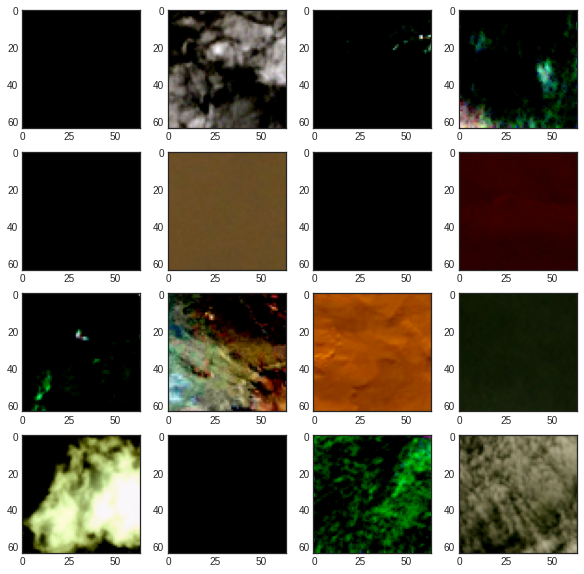

In [8]:
plot_data_loader(train_loader, (4,4))

**Load RESNET50 Model with Pretrained Model Weights** 

In [9]:
########### Load the Pre-trained Model ###########
model = models.resnet50(weights=True) 

# freeze pre-trained layers
for param in model.parameters(): 
  param.requires_grad = False

# re-define the final fully-connected layer, and this one will be trained with the dataset
# num_classes = 4
model.fc = nn.Sequential(nn.Linear(2048, 512),
                                nn.ReLU(),
                                nn.Dropout(0.2),
                                nn.Linear(512, 4))

print(model)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

**Set the hyperparameters**

In [10]:
# define the loss function for multi-class classifictaion
criterion = nn.CrossEntropyLoss()


#Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.0001)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 3, verbose=False)

# create and early stopping object which will be used during the training
early_stopping = EarlyStopping(tolerance=3, min_delta=0.01)

num_epochs = 40

**Train the Model with train_loader and perform validation with valid_loader**

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)
print("Device: {}".format(device))

model.to(device)

minibatch_loss_list, train_acc_list, valid_acc_list, train_loss_list, valid_loss_list = train_model(
    model=model,
    num_epochs=num_epochs,
    train_loader=train_loader,
    valid_loader=valid_loader,
    criterion = criterion,
    optimizer=optimizer,
    device=device,
    early_stopping=early_stopping,
    file_name = file_name,
    path_to_save_model=path_to_save_model,
    scheduler=scheduler)

Device: cuda:0
Epoch: 001/040 | Batch 0000/0124 | Loss: 1.4095
Epoch: 001/040 | Batch 0100/0124 | Loss: 0.5568
Epoch: 001/040 | Train ACC: 53.12% | Validation ACC: 86.32%| Train LOSS: 0.7881| Validation LOSS: 0.4653
Time elapsed: 38.66 min
Epoch: 002/040 | Batch 0000/0124 | Loss: 0.5495
Epoch: 002/040 | Batch 0100/0124 | Loss: 0.3820
Epoch: 002/040 | Train ACC: 85.94% | Validation ACC: 87.03%| Train LOSS: 0.4510| Validation LOSS: 0.4029
Time elapsed: 38.90 min
Epoch: 003/040 | Batch 0000/0124 | Loss: 0.3749
Epoch: 003/040 | Batch 0100/0124 | Loss: 0.2886
Epoch: 003/040 | Train ACC: 92.19% | Validation ACC: 88.99%| Train LOSS: 0.3895| Validation LOSS: 0.3357
Time elapsed: 39.14 min
Epoch: 004/040 | Batch 0000/0124 | Loss: 0.3818
Epoch: 004/040 | Batch 0100/0124 | Loss: 0.3465
Epoch: 004/040 | Train ACC: 87.50% | Validation ACC: 87.39%| Train LOSS: 0.3789| Validation LOSS: 0.3620
Time elapsed: 39.39 min
Epoch: 005/040 | Batch 0000/0124 | Loss: 0.2688
Epoch: 005/040 | Batch 0100/0124 | Lo

**Test Accuracy and test loss with Final Weights saved**

In [12]:
test_acc, test_loss= compute_accuracy_and_loss(model, test_loader,criterion, device=device)
print(f'Test Accuracy {test_acc :.2f}%')
print(f'Test Loss {test_loss :.4f}')

Test Accuracy 93.34%
Test Loss 0.1835


**Plot the Training Mini_Batch_loss**

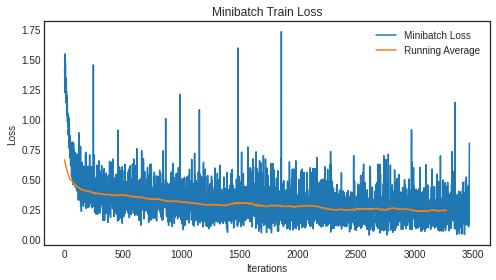

In [13]:
plot_training_batch_loss(minibatch_loss_list, num_epochs, len(train_loader))
plt.show()

**Plot train vs Validation Accuracy**

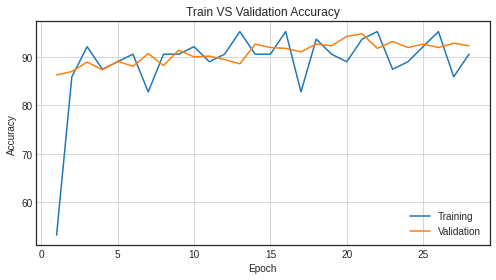

In [14]:
plot_accuracy(train_acc_list, valid_acc_list)
plt.show()

**Plot train vs Validation Loss**

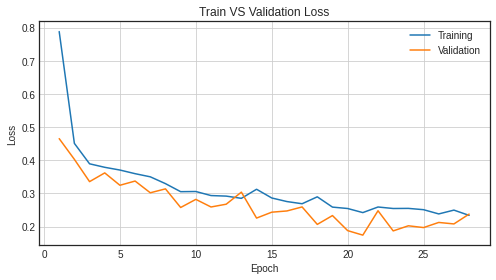

In [15]:
plot_loss(train_loss_list, valid_loss_list)
plt.show()

**Confusion Matrix**

In [16]:
label_encoding = data.class_to_idx

class_dict = {v: k for k, v in label_encoding.items()} #reverse the mapping

print(label_encoding)

{'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}


In [ ]:
# label_encoding = {'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}  # assign to a variable as it will be needed while prediciting

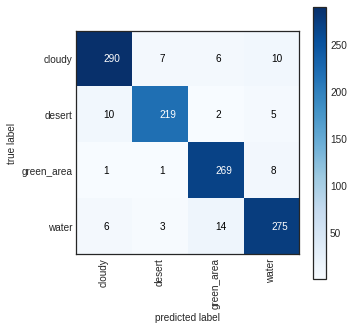

In [24]:
confusion_matrix = compute_confusion_matrix(model = model, data_loader = test_loader, device=device)
plot_confusion_matrix(confusion_matrix, class_names = class_dict.values())
plt.show()

**F1 Score, Precision and Recall**

In [18]:
print(compute_classification_report(test_loader, model, device=device ))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       309
           1       0.95      0.95      0.95       237
           2       0.97      0.93      0.95       290
           3       0.91      0.93      0.92       290

    accuracy                           0.94      1126
   macro avg       0.94      0.94      0.94      1126
weighted avg       0.94      0.94      0.94      1126



**Predicted labels Visualization**

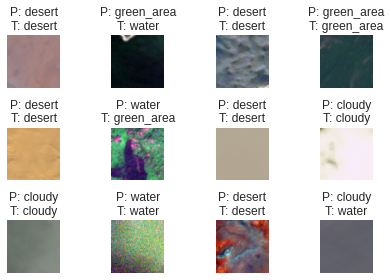

In [19]:
model.cpu()
unnormalizer = UnNormalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

show_examples(model=model, data_loader=test_loader, unnormalizer=unnormalizer, class_dict=class_dict)

**Load the saved model to make predictions**

In [20]:
model  = torch.load(path_to_save_model + file_name+'_FINAL_MODEL_WEIGHTS.pth', map_location=torch.device('cpu'))

In [21]:
# test image path 
img_path = '/content/drive/MyDrive/AI Project/Model Training/test_images/water_body_1014.jpg'

In [22]:
classes = ['cloudy','desert','green_area','water']
print("The predicted class is " , predict_image_class(model, img_path, classes))

The predicted class is  water
